<a href="https://colab.research.google.com/github/gannannavelorange/575/blob/master/src/P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
!git clone https://github.com/gannannavelorange/575

Cloning into '575'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 92 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (92/92), done.


In [0]:
cd 575/src/data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv
import statsmodels.api as sm
from scipy.stats import norm

In [0]:
mu=np.zeros(11)
names=['CAT','DIA','HD','MSFT','NKE','NVDA','PG','TM','VIG','VOO','WMT']
def getData(n=None):
    Is=[i for i in range(11)]
    Rows=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[2] for row in reader]
        mu[i]=np.mean([float(row) for row in rows[1:n]])
        Rows.append([float(row) for row in rows[1:n]])
    Omega=np.cov(np.array(Rows))
    return mu,Omega

In [0]:
def lin_loss(Vt,Wt,mu,omega):
  exp=-Vt*(np.dot(Wt,mu))
  var=(Vt**2)*(np.dot(np.dot(Wt,omega),Wt))
  return exp,var

In [0]:
'''
def loss(Vt,Wt,mu,omega):
  exp=-Vt*(np.dot(Wt,np.exp(mu))-np.dot(mu,np.ones(11)))
  var=(Vt**2)*(np.dot(np.dot(Wt,omega),Wt))
  return exp,var

In [0]:
mu=getData(1008)[0]
omega=getData(1008)[1]
#print(omega)
vt=1
wt=np.ones(11)*1/11
a=lin_loss(vt,wt,mu,omega)
exp=a[0]
var=a[1]


In [0]:
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

Text(0.5, 1.0, 'pdf of linearized loss distribution')

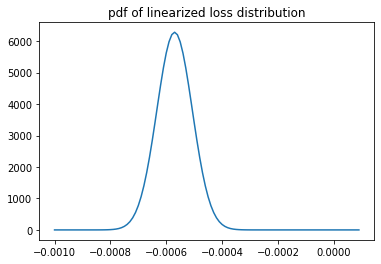

In [236]:
x = np.arange(-0.001,0.0001,0.00001) 
y = normfun(x, exp, var)
plt.plot(x,y)
plt.title('pdf of linearized loss distribution')


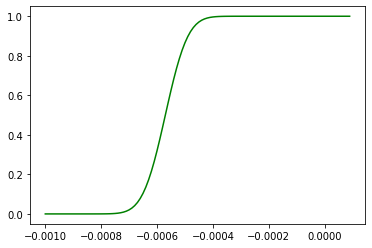

In [238]:
plt.plot(x, norm.cdf (x, exp, var),'g')

In [0]:
with open('loss.csv') as file:
      reader=csv.reader(file)
      rows=[row[1] for row in reader]
      #print(rows)
      mu_loss=np.mean([float(row) for row in rows[1:1008]] )
      variance=np.var([float(row) for row in rows[1:1008]])
      

In [256]:
print(values)

[]


Text(0.5, 1.0, 'pdf of  loss distribution')

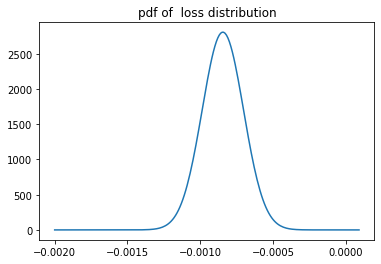

In [219]:
x_loss = np.arange(-0.002,0.0001,0.00001) 
y_loss = normfun(x_loss, mu_loss, variance)
plt.plot(x_loss,y_loss)
plt.title('pdf of  loss distribution')

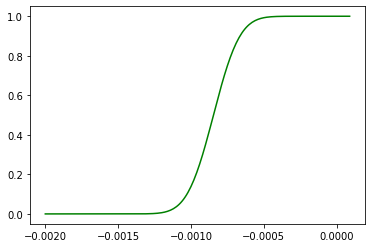

In [234]:

#x = linspace (mu-4*sigma, mu+4*sigma);
plt.plot(x_loss, norm.cdf (x_loss,mu_loss, variance),'g')


In [0]:
#problem3

In [0]:
with open('loss.csv') as file:
      reader=csv.reader(file)
      values=[row[0] for row in reader]
      values_future=[float(row) for row in values[1007:2013]]
      #print(values_future)
      

In [0]:
with open('loss.csv') as file:
      reader=csv.reader(file)
      log_returns=[row[2] for row in reader]
      log_returns_future=[float(row) for row in log_returns[1007:2013]]
      #print(log_returns_future)

No handles with labels found to put in legend.


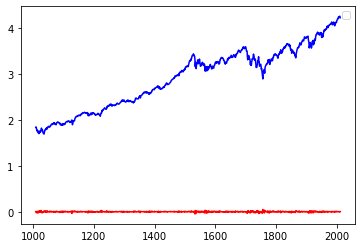

In [283]:
X=np.arange(1008,2013,1)
plt.plot(X,values_future,'b')
plt.plot(X,log_returns_future,'r')
plt.legend()

In [0]:
'''
price_0= getData(0)[2]
s=np.array(price_0)[:,0] #20120103 price
lamb=s*1/11 #original shares
print(s)
'''



In [0]:
'''
for M in range(3):
  data= getData(M)
  mu=data[0]
  omega=data[1]
  price=data[2]
  vt=np.dot(lamb,array(price)[:,2])
  wt=np.ones(2)*1/11
''' 

In [0]:
'''
mu=np.zeros(2)
names=['1','2']
def getData(M):
    Is=[i for i in range(2)]
    Rows=[]
    Price=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
           
            rows=[row[1] for row in reader]
        mu[i]=np.mean([float(row) for row in rows[3*M+1:3*M+4]])
        Rows.append([float(row) for row in rows[3*M+1:3*M+4]])
        
    Omega=np.cov(np.array(Rows))
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            price=[row[0] for row in reader]       
        Price.append([float(row) for row in price[3*M+1:3*M+4]])
    
    return mu,Omega,Price

    '''